Epoch 1/50
252/252 [==============================] - 14s 48ms/step - loss: 3.1604 - accuracy: 0.1414 - val_loss: 2.1486 - val_accuracy: 0.1446 - lr: 1.0000e-04
Epoch 2/50
252/252 [==============================] - 12s 47ms/step - loss: 2.8139 - accuracy: 0.1733 - val_loss: 2.0246 - val_accuracy: 0.2328 - lr: 1.0000e-04
Epoch 3/50
252/252 [==============================] - 12s 47ms/step - loss: 2.6387 - accuracy: 0.1882 - val_loss: 1.9639 - val_accuracy: 0.2650 - lr: 1.0000e-04
Epoch 4/50
252/252 [==============================] - 11s 42ms/step - loss: 2.4596 - accuracy: 0.2137 - val_loss: 1.9180 - val_accuracy: 0.2786 - lr: 1.0000e-04
Epoch 5/50
252/252 [==============================] - 11s 43ms/step - loss: 2.3758 - accuracy: 0.2214 - val_loss: 1.8832 - val_accuracy: 0.2899 - lr: 1.0000e-04
Epoch 6/50
252/252 [==============================] - 11s 43ms/step - loss: 2.2861 - accuracy: 0.2368 - val_loss: 1.8540 - val_accuracy: 0.2981 - lr: 1.0000e-04
Epoch 7/50
252/252 [==============

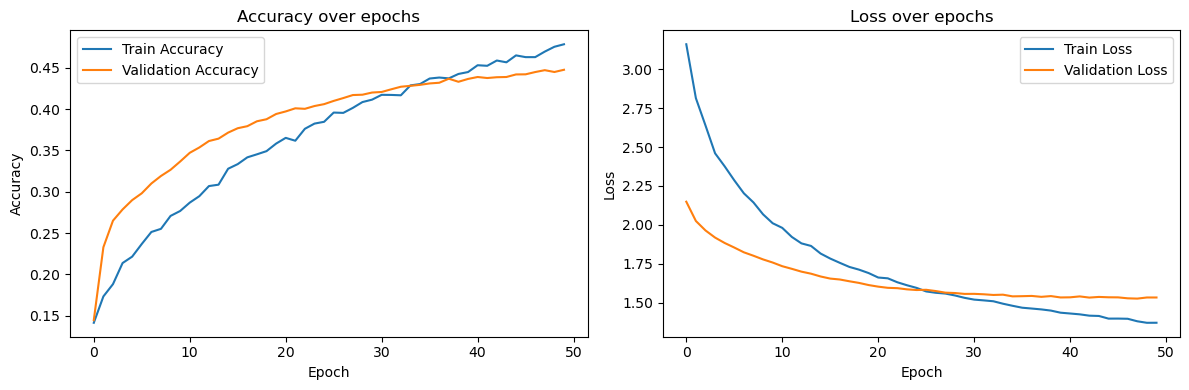

454/454 [==============================] - 3s 6ms/step

Classification Report:
              precision    recall  f1-score   support

       anger       0.42      0.15      0.22      1714
    contempt       0.33      0.33      0.33      1312
     disgust       0.33      0.07      0.11      1248
        fear       0.48      0.13      0.21      1664
       happy       0.75      0.74      0.74      2704
     neutral       0.57      0.80      0.66      2368
         sad       0.27      0.82      0.41      1584
    surprise       0.28      0.17      0.21      1920

    accuracy                           0.45     14514
   macro avg       0.43      0.40      0.36     14514
weighted avg       0.46      0.45      0.41     14514



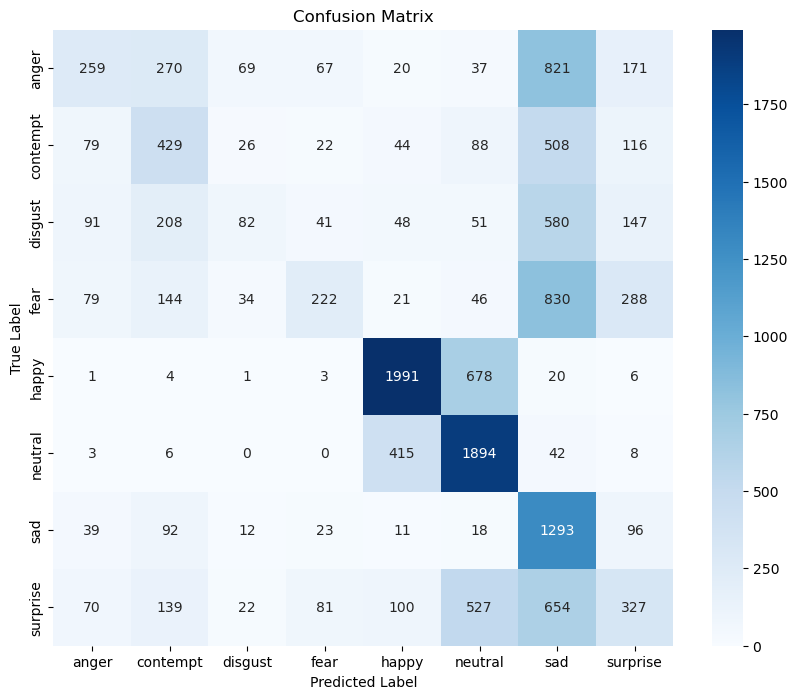

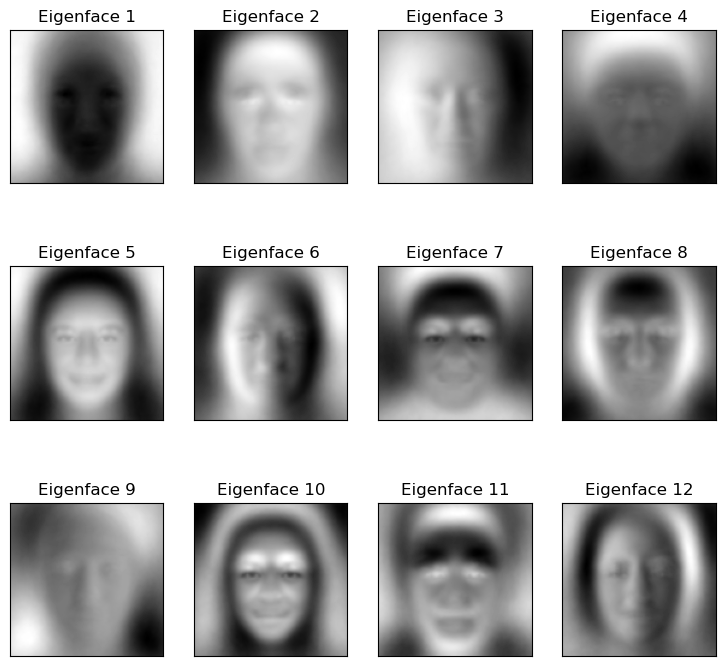

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 100, 1, 32)        128       
                                                                 
 batch_normalization_11 (Ba  (None, 100, 1, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 50, 1, 32)         0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 50, 1, 32)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 50, 1, 64)         6208      
                                                                 
 batch_normalization_12 (Ba  (None, 50, 1, 64)        

In [5]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
def load_data(csv_path, train_dir, test_dir):
    df = pd.read_csv(csv_path)
    
    # Filter only the samples we have in our dataset folders
    train_images = []
    train_labels = []
    test_images = []
    test_labels = []
    
    # Process train data
    for label in os.listdir(train_dir):
        label_dir = os.path.join(train_dir, label)
        for img_file in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (128, 128))
                img = img.astype('float32') / 255.0
                train_images.append(img)
                train_labels.append(label)
    
    # Process test data
    for label in os.listdir(test_dir):
        label_dir = os.path.join(test_dir, label)
        for img_file in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (128, 128))
                img = img.astype('float32') / 255.0
                test_images.append(img)
                test_labels.append(label)
    
    # Convert to numpy arrays
    train_images = np.array(train_images)
    train_labels = np.array(train_labels)
    test_images = np.array(test_images)
    test_labels = np.array(test_labels)
    
    return train_images, train_labels, test_images, test_labels

# Paths to data
csv_path = "C:/Users/fatim/OneDrive/Desktop/Machine learning/dataset/labels.csv"
train_dir = "C:/Users/fatim/OneDrive/Desktop/Machine learning/dataset/train"
test_dir = "C:/Users/fatim/OneDrive/Desktop/Machine learning/dataset/test"

# Load data
X_train, y_train, X_test, y_test = load_data(csv_path, train_dir, test_dir)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert to categorical
num_classes = len(np.unique(y_train_encoded))
y_train_categorical = to_categorical(y_train_encoded, num_classes)
y_test_categorical = to_categorical(y_test_encoded, num_classes)

# Apply PCA (Eigenfaces)
n_components = 100  # Number of principal components to keep
pca = PCA(n_components=n_components, whiten=True)

# Reshape data for PCA
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Fit PCA on training data
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

# Reshape for CNN input
X_train_pca_reshaped = X_train_pca.reshape(-1, n_components, 1, 1)
X_test_pca_reshaped = X_test_pca.reshape(-1, n_components, 1, 1)

# Build CNN model with adjusted architecture
def build_model(input_shape, num_classes):
    model = Sequential()
    
    # Adjusting the architecture for the input shape
    model.add(Conv2D(32, (3, 1), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 1)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 1), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 1)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3, 1), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 1)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model

# Model input shape
input_shape = (n_components, 1, 1)

# Build and train model
model = build_model(input_shape, num_classes)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train model
history = model.fit(
    X_train_pca_reshaped, y_train_categorical,
    validation_data=(X_test_pca_reshaped, y_test_categorical),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate model
test_loss, test_acc = model.evaluate(X_test_pca_reshaped, y_test_categorical, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_history(history)

# Classification report and confusion matrix
y_pred = model.predict(X_test_pca_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))

# Confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(y_test_classes, y_pred_classes, label_encoder.classes_)

# Visualize Eigenfaces
def plot_eigenfaces(pca, h=128, w=128, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(pca.components_[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(f"Eigenface {i + 1}", size=12)
        plt.xticks(())
        plt.yticks(())
    
    plt.show()

plot_eigenfaces(pca)

# Print model summary
model.summary()